# Multiple linear regression
Multiple linear regression builds on linear regression where additional attributes are used. While a straight line represents the prediction of a standard ‘X,Y’ graph, multiple linear regression can be used for higher numbers of columns, higher than those that can be graphed.

## Difference in the equation
In the linear regression the equation is  
*y = mx + b*  
Where m and b are estimated through linear regression. In Multiple linear regression the equation is  
*y = b + $m_{1}x_{1} + m_{2}x_{2} + … + m_{n}x_{n}$*  
In the example below, we see how to implement this, but also how to score the prediction of the y values using the score function of SK-Learn


In [1]:
# importing modules
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## MLR Manhattan Housing
Here the data set has multiple columns which become more difficult to fit manually, but pose little problem to the algorithms working in higher dimensions. 

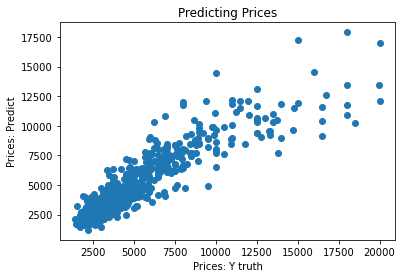

In [15]:
# Accessing the 'CSV' file from online
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

# Creating a data frome from the CSV
df = pd.DataFrame(streeteasy)

# Segmenting 'x' and 'y' for adding these into the MLR ML model
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]

# Splitting the dat for test and train for comparison
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

# Instantiating and fitting the linear regression model
mlr = LinearRegression()
model=mlr.fit(x_train, y_train)

# Using the fitted model to predict the test 'x' values
y_predict = mlr.predict(x_test)

# Outputting the visualisation of each coefficient for each of the 14 columns ('m')
# print(mlr.coef_)

# plotting real and predicted values
plt.scatter(y_test, y_predict)
plt.xlabel('Prices: Y truth')
plt.ylabel('Prices: Predict')
plt.title('Predicting Prices')
plt.show()


## Evaluating accuracy
When trying to evaluate the accuracy of our multiple linear regression model, one technique we can use is Residual Analysis.

The difference between the actual value y, and the predicted value ŷ is the residual e. The equation is:

e = y - ŷ
 
In the StreetEasy dataset, y is the actual rent and the ŷ is the predicted rent. The real y values should be pretty close to these predicted y values.

sklearn‘s linear_model.LinearRegression comes with a .score() method that returns the coefficient of determination R² of the prediction.

The coefficient R² is defined as:

1 - (u/v)
 
where u is the residual sum of squares:  
((y - y_predict) ** 2).sum()  
and v is the total sum of squares (TSS):  
  
((y - y.mean()) ** 2).sum()  
The TSS tells you how much variation there is in the y variable.  

R² is the percentage variation in y explained by all the x variables together.  

For example, say we are trying to predict rent based on the size_sqft and the bedrooms in the apartment and the R² for our model is 0.72 — that means that all the x variables (square feet and number of bedrooms) together explain 72% variation in y (rent).  

Now let’s say we add another x variable, building’s age, to our model. By adding this third relevant x variable, the R² is expected to go up. Let say the new R² is 0.95. This means that square feet, number of bedrooms and age of the building together explain 95% of the variation in the rent.  

The best possible R² is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a R² of 0.70 is considered good.  

In [17]:
# Score of the training set and the test set
print(f'Score train: {mlr.score(x_train, y_train)}')
print(f'Score test: {mlr.score(x_test, y_test)}')

Score train: 0.7725460559817883
Score test: 0.805037197535764


From the assumption that > 0.7 is good, then the fitting of the data is to be relied on.